## Introduction 

#### Abstract
*It was aimed to estimate female or male voices from small sections according to the frequencies of female and male voices.*

#### Feature Dict
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

#### Contents 

- Importing Libraries(DONE)
- General Data Analysis(DONE) 
- Train And Test splitting avoid to data leakge*(DONE)
- Feature Engineering(DONE)
- Exploraty Data Analysis(DONE)
- Model building(DONE)

### Importing Libraries 

In [178]:
import pandas as pd # Exploraty data analysis and dataframe manuplulation 
import numpy as np # Manupulation array manuplation 
from scipy import stats # Manupulation array manuplation
import matplotlib.pyplot as plt # Visualizations Exploraty data analysis
import seaborn as sns # Visualizations Exploraty data analysis
from sklearn.model_selection import train_test_split # train and test splitting 
from collections import Counter
from sklearn.preprocessing import StandardScaler # scaling data numerical columns 
from sklearn.preprocessing import RobustScaler  # scalin data numerical columns 
from sklearn.model_selection import RandomizedSearchCV # hyperparameter optimization 
from sklearn.model_selection import GridSearchCV # hyperparameter optimization 
from sklearn.preprocessing import LabelEncoder # encoding objects 

# Models that we used
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report # testing models results 

import warnings
warnings.filterwarnings('ignore')

### General Data Analysis

In [164]:
# load to dataset 
df = pd.read_csv('voice.csv')

In [165]:
# First five elements analyz
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [166]:
# Dtypes analyz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [167]:
# null values calculation according to features 
def null_values(df):

    # null values count dict
    null_values_dict = {}

    for i in df.columns:
        null_values_dict['{}'.format(i)] = df['{}'.format(i)].isnull().sum()*100/df.shape[0]

    return null_values_dict

In [168]:
null_values(df)

{'meanfreq': 0.0,
 'sd': 0.0,
 'median': 0.0,
 'Q25': 0.0,
 'Q75': 0.0,
 'IQR': 0.0,
 'skew': 0.0,
 'kurt': 0.0,
 'sp.ent': 0.0,
 'sfm': 0.0,
 'mode': 0.0,
 'centroid': 0.0,
 'meanfun': 0.0,
 'minfun': 0.0,
 'maxfun': 0.0,
 'meandom': 0.0,
 'mindom': 0.0,
 'maxdom': 0.0,
 'dfrange': 0.0,
 'modindx': 0.0,
 'label': 0.0}

### Train And Test splitting avoid to data leakge

In [169]:
y = df['label'] # labelları 
X = df.drop('label', axis = 1) # inputlar  

In [170]:
# train ve test ayırımı 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (2534, 20)
y_train shape: (2534,)
X_test shape: (634, 20)
y_test shape: (634,)


### Feature Engineering 

In [171]:
# outlier analyis
def outlier_analyz(df):

    # features outliers values dict
    outlier_dict_percentage = {}
    outlier_dict_values = {}

    for i in df.columns:
        
        # 1st quartile
        Q1 = np.percentile(df[i],25)
        # 3rd quartile
        Q3 = np.percentile(df[i],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        
        # counting outlier values
        outlier_dict_percentage['{}'.format(i)] = len(df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index)*100/df.shape[0]
        outlier_dict_values['{}'.format(i)] = len(df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index)

        # Convert the dataframe 
        df_outlier_dict_percentage = pd.DataFrame.from_dict(outlier_dict_percentage, orient='index')
        df_outlier_dict_values = pd.DataFrame.from_dict(outlier_dict_values, orient='index')

        # concat the data frame 
        outlier_analyz = pd.concat([df_outlier_dict_percentage, df_outlier_dict_values], names = ['percentage', 'count'], axis = 1)
        outlier_analyz = outlier_analyz.rename({0:'Percantage', 0:'Count'})

    return outlier_analyz 


In [172]:
outlier_analyz(X_train)

,0,0
meanfreq,2.170481,55
sd,0.315706,8
median,3.591160,91
Q25,1.144436,29
Q75,0.907656,23
IQR,0.315706,8
skew,7.616417,193
kurt,10.615627,269
sp.ent,0.157853,4
sfm,0.000000,0


In [11]:
X_train

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
807,0.180360,0.053766,0.189474,0.141895,0.213474,0.071579,1.473165,4.899974,0.918149,0.395065,0.186526,0.180360,0.132277,0.047013,0.279070,0.968568,0.023438,4.148438,4.125000,0.128314
2495,0.185643,0.065043,0.203955,0.186017,0.223454,0.037437,2.732155,11.206323,0.898330,0.476308,0.199666,0.185643,0.175833,0.048241,0.275862,1.077674,0.023438,6.023438,6.000000,0.086686
2529,0.203908,0.045961,0.201869,0.177944,0.239626,0.061682,2.247859,10.481790,0.898687,0.358451,0.177944,0.203908,0.169617,0.047291,0.274286,1.265126,0.023438,8.554688,8.531250,0.084143
2241,0.115789,0.081103,0.102197,0.038124,0.193181,0.155057,1.620439,6.600749,0.962574,0.746873,0.017620,0.115789,0.200910,0.075829,0.258065,0.452257,0.007812,1.578125,1.570312,0.250933
2981,0.179889,0.067810,0.163096,0.137244,0.246925,0.109681,2.106748,8.030296,0.932428,0.551025,0.156253,0.179889,0.136662,0.033898,0.277778,0.963949,0.043945,3.999023,3.955078,0.261785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.166738,0.052677,0.169427,0.162650,0.189223,0.026573,7.550412,76.134526,0.865282,0.427317,0.167465,0.166738,0.152651,0.022727,0.208333,0.174154,0.161133,0.214844,0.053711,0.136364
1095,0.198718,0.058959,0.217333,0.143111,0.252000,0.108889,1.116666,3.569725,0.917123,0.363369,0.227556,0.198718,0.139322,0.050473,0.279070,0.792092,0.023438,4.968750,4.945312,0.155766
1130,0.202333,0.063001,0.221946,0.137544,0.264817,0.127273,2.000371,6.681799,0.873847,0.261759,0.272855,0.202333,0.123610,0.047291,0.269663,1.190168,0.023438,7.429688,7.406250,0.093438
1294,0.181799,0.058102,0.192037,0.123670,0.225568,0.101897,1.091660,4.009295,0.925575,0.427947,0.190731,0.181799,0.110586,0.049741,0.274286,0.789062,0.023438,4.359375,4.335938,0.062312


In [13]:
def detect_multiple_outliers(df):
    outlier_indices = []
    
    for i in df.columns:
        # 1st quartile
        Q1 = np.percentile(df[i],25)
        # 3rd quartile
        Q3 = np.percentile(df[i],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [14]:
list_multiple_outliers = detect_multiple_outliers(X_train)

In [15]:
len(list_multiple_outliers)

159

In [16]:
X_train = X_train.drop(detect_multiple_outliers(X_train),axis = 0).reset_index(drop = True)
# convert the dataframe
y_train = pd.DataFrame(y_train)
# drop the outlier indexes from labels 
y_train = y_train.drop(list_multiple_outliers,axis = 0).reset_index(drop = True)

### Boxplot ve histplot analysis

In [17]:
def control_scale(df):
    
    # analysis outlier values that we did 
    list_scale_control = ['skew', 'kurt','maxfun','mindom', 'modindx']

    # graphs building  
    for i in list_scale_control:
        
        sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
        
        fig, box = plt.subplots(figsize = (7,7))
        box = sns.boxplot(y = '{}'.format(i), data = df)
        box.set_xlabel("{}".format(i), fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
        box.set_ylabel('Values', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
        box.set_title('{} Outlier visualization'.format(i), fontdict= { 'fontsize': 13, 'fontweight':'bold','fontfamily':'Avant Garde'})
        plt.show()


findfont: Font family ['Lucid'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avant Garde'] not found. Falling back to DejaVu Sans.


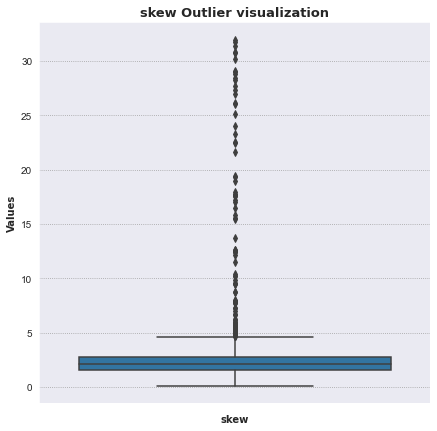

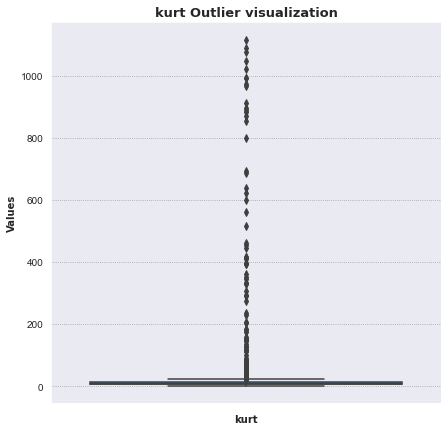

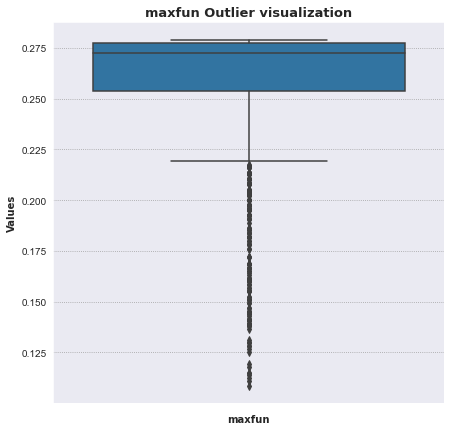

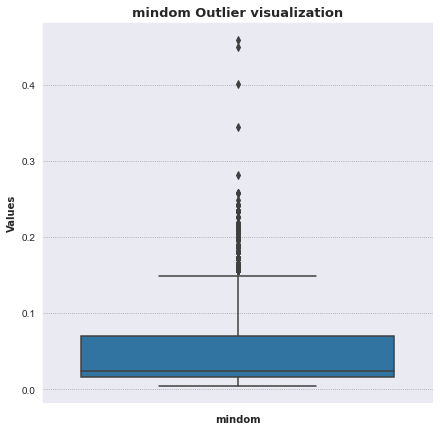

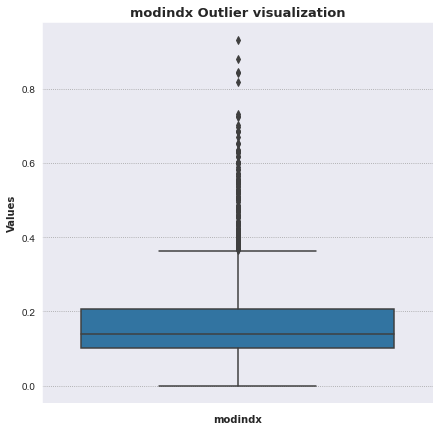

In [18]:
control_scale(X_train)

In [19]:
def std_analyz(df):

    # analyis features for std
    list_scale_control = ['skew', 'kurt','maxfun','mindom', 'modindx']
    
    # std graphs builing 
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
        
    for i in list_scale_control:

        fig, dist = plt.subplots(figsize = (7,7))
        dist = sns.histplot(data = df, 
        x = '{}'.format(i),
        stat='probability',common_norm=False,bins = 15, color = ['red'])
        
        dist.set_xlabel("Values", fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
        dist.set_ylabel("Prob", fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
        plt.title('{} Outlier visualization'.format(i), fontdict= { 'fontsize': 13, 'fontweight':'bold','fontfamily':'Avant Garde'})
        plt.show()

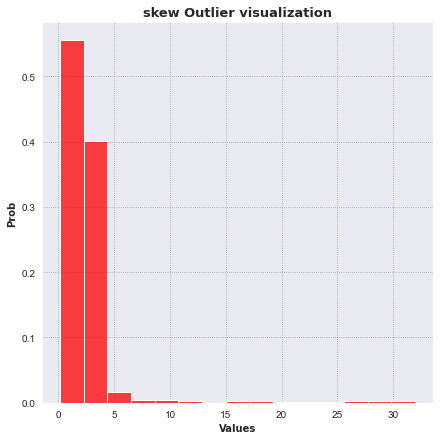

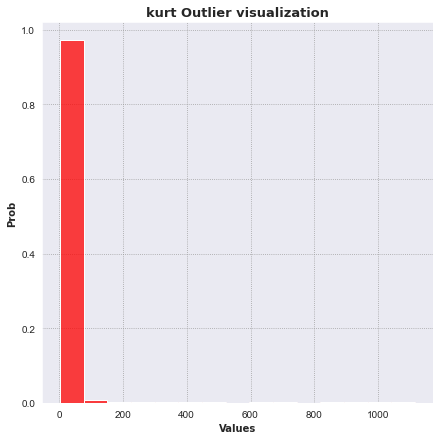

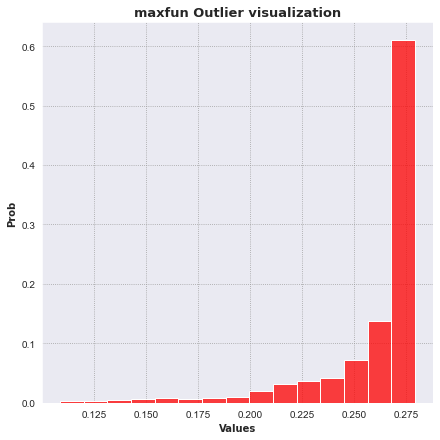

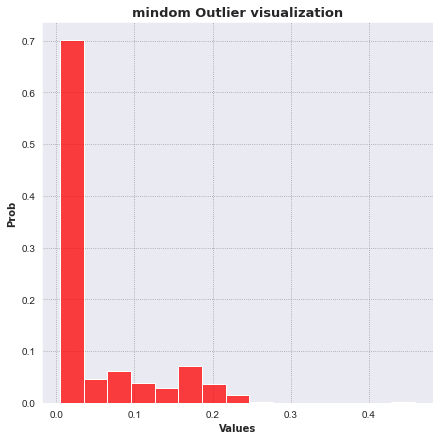

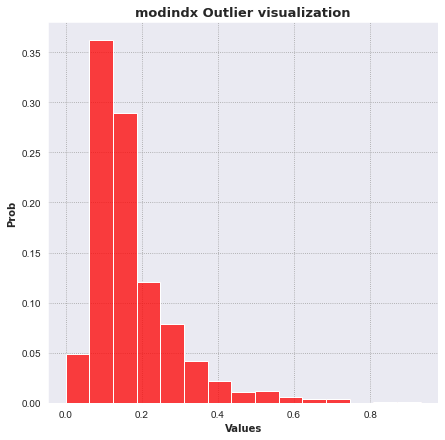

In [20]:
std_analyz(X_train)

### Scaleing processes

In [21]:
def standartization_std(X_train, X_test):

    # Model building 
    Ss = RobustScaler()

    # df columns list
    list_columns = df.columns

    # fit and transform in train and test set
    Ss.fit(X_train)
    X_train_scaled = Ss.transform(X_train)
    X_test_scaled = Ss.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns= X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns= X_test.columns)

    return X_train_scaled, X_test_scaled

In [22]:
X_train_scaled, X_test_scaled = standartization_std(X_train, X_test)

In [23]:
X_train.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,0.183751,0.056154,0.189066,0.143966,0.226965,0.082999,2.638794,22.685014,0.896200,0.403230,0.171264,0.183751,0.143043,0.037158,0.260258,0.867374,0.051892,5.276640,5.224748,0.172135
std,0.026780,0.016023,0.031719,0.044582,0.020619,0.040321,2.929278,91.732397,0.044178,0.178150,0.072462,0.026780,0.031662,0.017531,0.029056,0.516698,0.061715,3.457742,3.457517,0.112891
min,0.110683,0.018363,0.082370,0.022833,0.154862,0.014922,0.141735,2.209673,0.766037,0.036876,0.000000,0.110683,0.055565,0.009901,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.167104,0.040990,0.173372,0.114758,0.210854,0.043030,1.608952,5.482179,0.862645,0.253338,0.126034,0.167104,0.118090,0.018768,0.253968,0.462915,0.015625,2.906250,2.871094,0.101140
50%,0.186219,0.058959,0.191071,0.141013,0.227272,0.093205,2.124454,7.951889,0.902960,0.388798,0.190129,0.186219,0.139780,0.046967,0.272727,0.801930,0.023438,5.179688,5.132812,0.139054
75%,0.199783,0.065332,0.211970,0.176598,0.244342,0.113174,2.807240,12.710179,0.928727,0.528958,0.223288,0.199783,0.169593,0.048000,0.277457,1.214021,0.070312,7.500000,7.476562,0.206369
max,0.251124,0.096062,0.261224,0.247347,0.273469,0.195527,31.951459,1116.036622,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.843750,21.820312,0.932374


In [24]:
X_train_scaled.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,-0.075525,-0.115209,-0.051942,0.047744,-0.009168,-0.145507,0.429229,2.038341,-0.102298,0.052363,-0.193981,-0.075525,0.063339,-0.335553,-0.530879,0.087131,0.520313,0.021105,0.019962,0.314370
std,0.819502,0.658224,0.821756,0.720926,0.615710,0.574829,2.444554,12.691257,0.668533,0.646359,0.745084,0.819502,0.614768,0.599726,1.237017,0.687916,1.128499,0.752706,0.750742,1.072809
min,-2.311506,-1.667660,-2.816202,-1.911065,-2.162217,-1.116038,-1.654627,-0.794441,-2.072014,-1.276833,-1.954984,-2.311506,-1.635164,-1.268000,-6.983518,-1.057264,-0.339286,-1.125850,-1.114504,-1.321444
25%,-0.584934,-0.738163,-0.458542,-0.424557,-0.490261,-0.715322,-0.430199,-0.341686,-0.610080,-0.491472,-0.659048,-0.584934,-0.421147,-0.964652,-0.798651,-0.451354,-0.142857,-0.494898,-0.491094,-0.360302
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.415066,0.261837,0.541458,0.575443,0.509739,0.284678,0.569801,0.658314,0.389920,0.508528,0.340952,0.415066,0.578853,0.035348,0.201349,0.548646,0.857143,0.505102,0.508906,0.639698
max,1.986157,1.524200,1.817527,1.719498,1.379516,1.458737,24.891360,153.304492,1.196031,1.647695,0.924090,1.986157,1.900020,5.374819,0.271907,2.870103,7.964286,3.627551,3.623410,7.538985


In [25]:
X_test.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,0.181125,0.057189,0.185196,0.140810,0.225488,0.084678,3.077598,35.049547,0.895778,0.408751,0.165232,0.181125,0.141763,0.036435,0.258653,0.805415,0.051815,4.969545,4.917730,0.172295
std,0.029569,0.016490,0.036714,0.047590,0.023897,0.042087,4.199248,137.704497,0.044344,0.177499,0.078377,0.029569,0.033025,0.019543,0.030423,0.510313,0.063348,3.409141,3.408050,0.120282
min,0.048254,0.024002,0.015790,0.000235,0.058268,0.017429,0.589787,2.503954,0.747695,0.084934,0.000000,0.048254,0.062542,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163471,0.042405,0.168733,0.111098,0.209129,0.043108,1.703854,5.831767,0.862683,0.259913,0.116032,0.163471,0.115602,0.017877,0.250327,0.418418,0.007812,2.080078,2.068359,0.099505
50%,0.184824,0.059303,0.189823,0.139751,0.226819,0.095782,2.221974,8.548841,0.902444,0.394786,0.186745,0.184824,0.138100,0.042895,0.271186,0.734233,0.023438,4.996094,4.980469,0.140079
75%,0.199197,0.067235,0.210250,0.176866,0.243722,0.113778,2.896505,13.459894,0.929390,0.531299,0.223435,0.199197,0.169073,0.047809,0.277457,1.144075,0.070312,6.843750,6.791016,0.203141
max,0.247041,0.110261,0.257417,0.242124,0.268924,0.245300,34.537488,1271.353628,0.974767,0.807552,0.280000,0.247041,0.229153,0.200000,0.279114,2.515443,0.257812,21.867188,21.843750,0.854701


In [26]:
X_test_scaled.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,-0.155898,-0.072700,-0.152210,-0.003288,-0.053264,-0.121569,0.795422,3.748985,-0.108682,0.072393,-0.255999,-0.155898,0.038500,-0.360291,-0.599219,0.004640,0.518901,-0.045745,-0.046701,0.315889
std,0.904858,0.677412,0.951176,0.769563,0.713598,0.600006,3.504374,19.051538,0.671043,0.643998,0.805899,0.904858,0.641226,0.668561,1.295236,0.679416,1.158371,0.742126,0.740001,1.143045
min,-4.221895,-1.436033,-4.541128,-2.276477,-5.046615,-1.080305,-1.280716,-0.753726,-2.349579,-1.102471,-1.954984,-4.221895,-1.499708,-1.272304,-7.222056,-1.057264,-0.339286,-1.125850,-1.114504,-1.321444
25%,-0.696126,-0.680033,-0.578717,-0.483743,-0.541755,-0.714210,-0.351001,-0.293321,-0.609504,-0.467617,-0.761900,-0.696126,-0.469455,-0.995141,-0.953665,-0.510597,-0.285714,-0.674745,-0.665394,-0.375838
50%,-0.042694,0.014162,-0.032329,-0.020402,-0.013524,0.036730,0.081383,0.082589,-0.007816,0.021726,-0.034795,-0.042694,-0.032636,-0.139277,-0.065600,-0.090129,0.000000,-0.039966,-0.033079,0.009735
75%,0.397150,0.339998,0.496901,0.579772,0.491216,0.293288,0.644295,0.762037,0.399960,0.517021,0.342467,0.397150,0.568764,0.028806,0.201349,0.455521,0.857143,0.362245,0.360051,0.609024
max,1.861211,2.107501,1.718884,1.635032,1.243787,2.168333,27.049463,174.792736,1.086626,1.519315,0.924090,1.861211,1.735293,5.235188,0.271907,2.281320,4.285714,3.632653,3.628499,6.800850


### Exploraty Data Analysis

- Charts
- Lineplots
- Barplots

### Charts

In [27]:
# Label percantage 
def label_percentage_chart(df): 
    mylabels = ["male","female"]
    myexplode = [0, 0]
    wp = { 'linewidth' : 1, 'edgecolor' : "black" }
    colors = ['red', 'pink']
    
    fig, ax = plt.subplots(figsize =(10, 7))
    edges, texts, autotexts = plt.pie(df['label'].value_counts(), 
    labels = mylabels, 
    explode = myexplode, 
    shadow = True, 
    autopct='%1.0f%%', 
    startangle = 90, 
    wedgeprops = wp, 
    colors = colors)
    plt.setp(autotexts, size = 12, weight ="bold")

    centre_circle = plt.Circle((0,0),0.40,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title("Gender Percentage", 
    fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16})
    plt.legend(loc = 'best')
    plt.show()

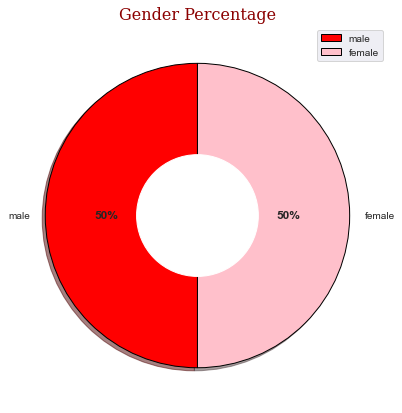

In [28]:
label_percentage_chart(df)

In [175]:
# upper-median-lower-median, upper-mean-lower-mean analysis
def median_analyz(df):

    # outlier features
    list_outlier = ['kurt','maxfun','mindom','modindx','skew']

    # extraction df
    df_cutting = df.copy()

    # medyan eşiklenmesinin yapılması 
    for i in list_outlier:

        df_cutting['{}_label_median'.format(i)] = pd.cut(df['{}'.format(i)], 
        bins = [-np.Inf,df_cutting['{}'.format(i)].median(), np.Inf], 
        labels = ['lower median', 'upper median']) 

        df_cutting['{}_label_mean'.format(i)] = pd.cut(df['{}'.format(i)], 
        bins = [-np.Inf,df_cutting['{}'.format(i)].mean(), np.Inf], 
        labels = ['lower mean', 'upper mean']) 

    # plotting charts

    mylabels = ['lower median','upper median']
    mylabels_2 = ['lower mean', 'upper mean']
    myexplode = [0.1,0]
    colors = ['red', 'orange']
    wp = { 'linewidth' : 1, 'edgecolor' : "black" }

    fig, axs = plt.subplots(4, 5, figsize=(35,25))
    for i,j in zip(list_outlier,range(5)):
        edges, texts, autotexts = axs[0][j].pie(df_cutting[df_cutting['label'] == 'male']['{}_label_median'.format(i)].value_counts(), 
        labels = mylabels, 
        explode = myexplode, 
        shadow = True, 
        autopct='%1.0f%%', 
        startangle = 90, 
        wedgeprops = wp, 
        colors = colors)
        plt.setp(autotexts, size = 25, weight ="bold")
        axs[0][j].set_title('{}_label Median Percantage_male'.format(i), 
        fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 17})
        axs[0][j].legend(loc = 'upper right', prop={'size': 17})

        edges, texts, autotexts = axs[1][j].pie(df_cutting[df_cutting['label'] == 'female']['{}_label_median'.format(i)].value_counts(), 
        labels = mylabels, 
        explode = myexplode, 
        shadow = True, 
        autopct='%1.0f%%', 
        startangle = 90, 
        wedgeprops = wp, 
        colors = colors)
        plt.setp(autotexts, size = 25, weight ="bold")
        axs[1][j].set_title('{}_label Median Percantage_female'.format(i), 
        fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 17})
        axs[1][j].legend(loc = 'best', prop={'size': 17})
        
        edges, texts, autotexts = axs[2][j].pie(df_cutting[df_cutting['label'] == 'male']['{}_label_mean'.format(i)].value_counts(), 
        labels = mylabels_2, 
        explode = myexplode, 
        shadow = True, 
        autopct='%1.0f%%', 
        startangle = 90, 
        wedgeprops = wp, 
        colors = colors)
        plt.setp(autotexts, size = 25, weight ="bold")
        axs[2][j].set_title('{}_label Mean Percantage_female'.format(i), 
        fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 17})
        axs[2][j].legend(loc = 'best', prop={'size': 17})

        edges, texts, autotexts = axs[3][j].pie(df_cutting[df_cutting['label'] == 'female']['{}_label_mean'.format(i)].value_counts(), 
        labels = mylabels_2, 
        explode = myexplode, 
        shadow = True, 
        autopct='%1.0f%%', 
        startangle = 90, 
        wedgeprops = wp, 
        colors = colors)
        plt.setp(autotexts, size = 25, weight ="bold")
        axs[3][j].set_title('{}_label Mean Percantage_female'.format(i), 
        fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 17})
        axs[3][j].legend(loc = 'best', prop={'size': 17})
    plt.show()
        
    return df_cutting

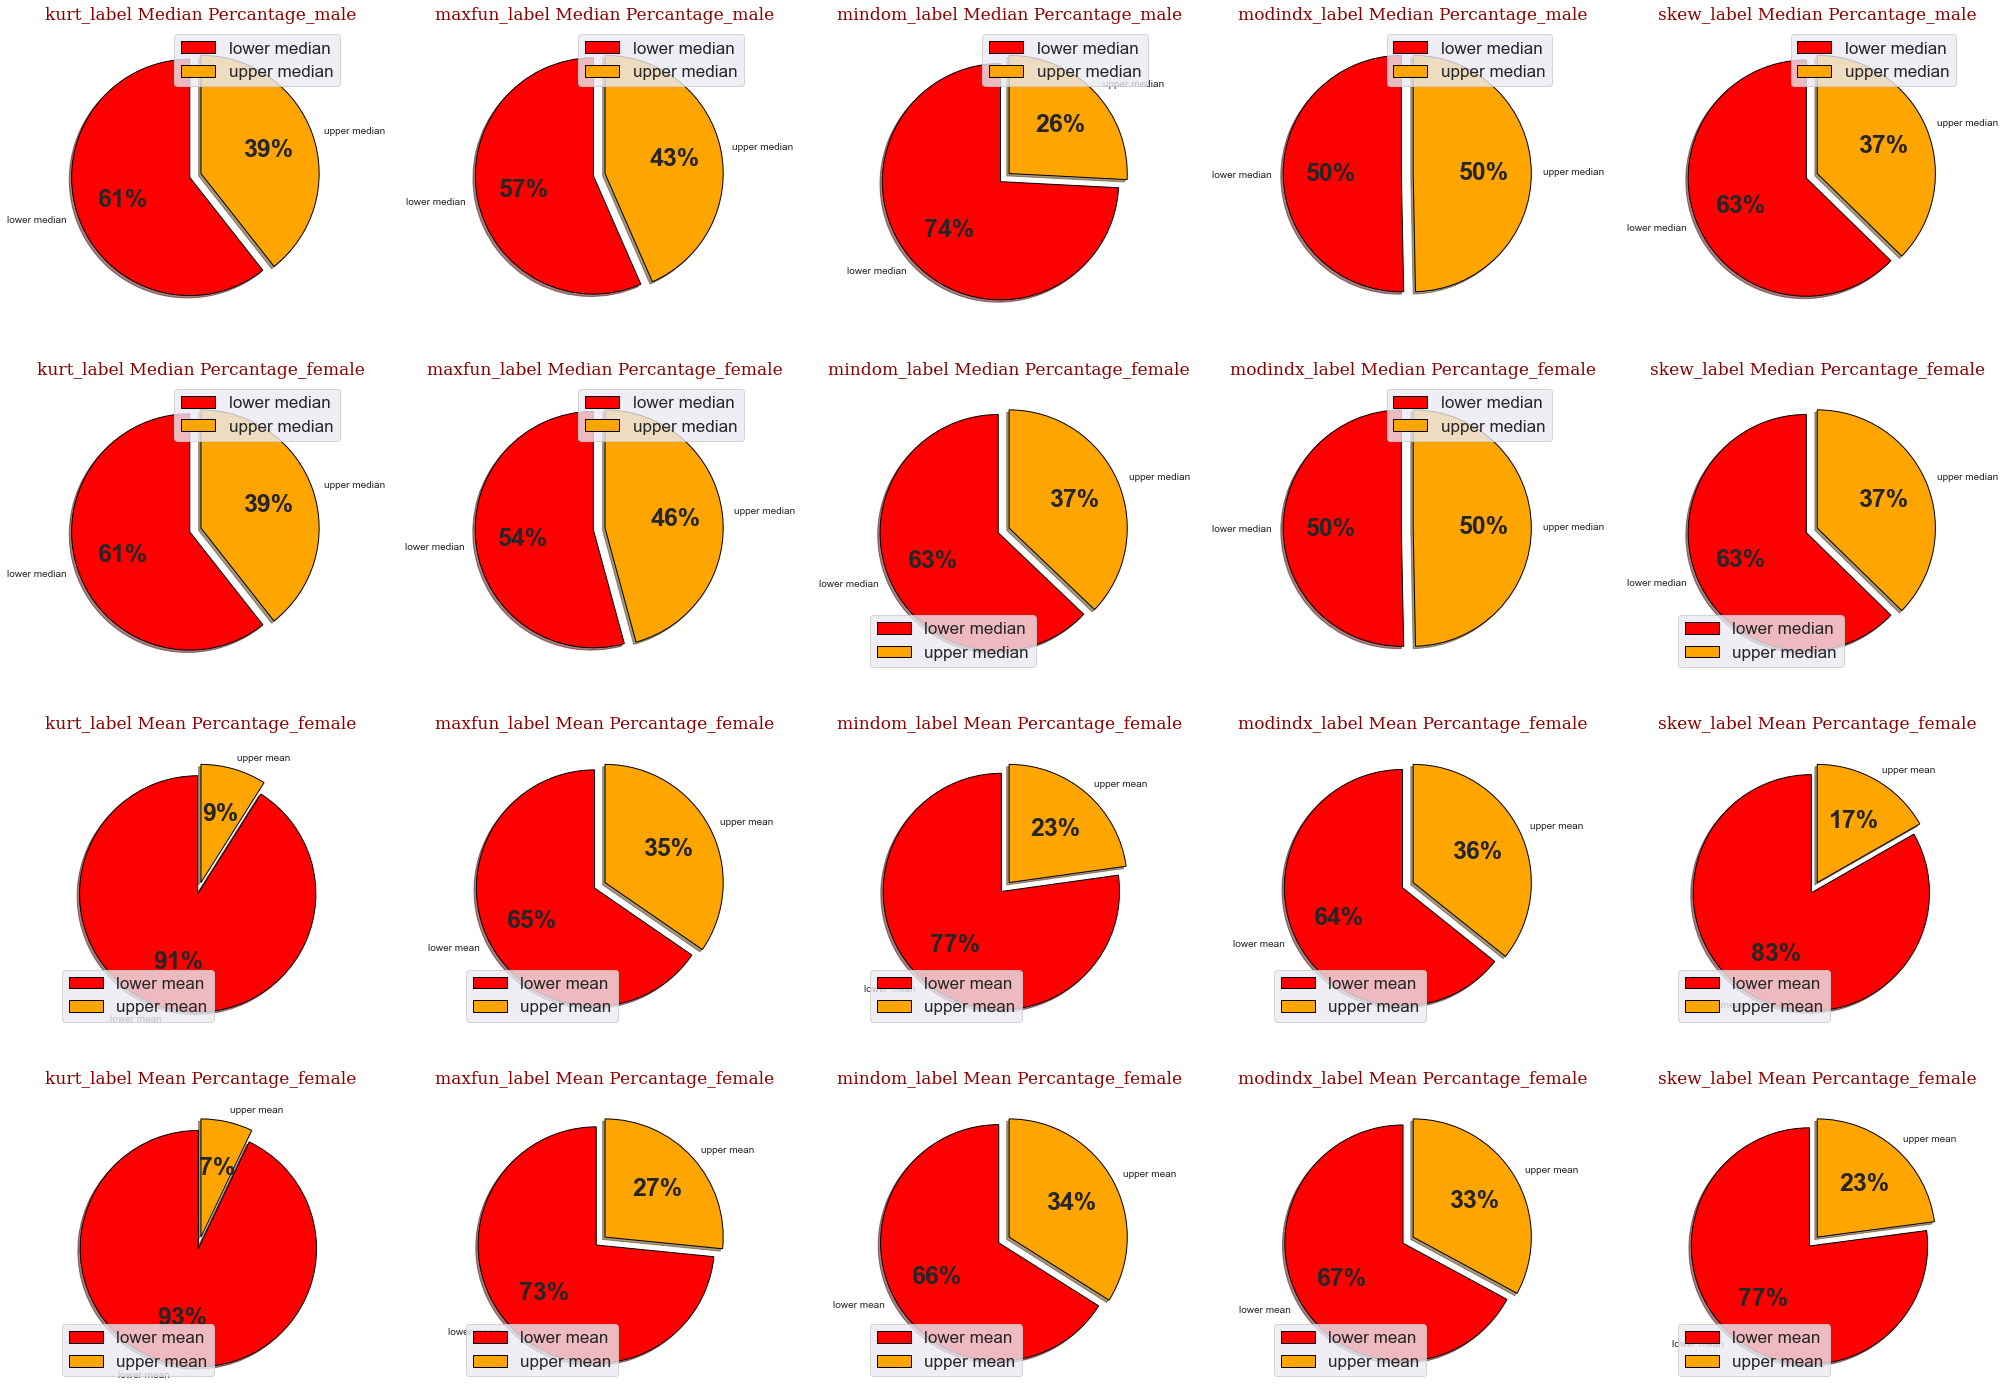

In [176]:
df_cutting = median_analyz(df)

In [177]:
df_cutting

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,kurt_label_median,kurt_label_mean,maxfun_label_median,maxfun_label_mean,mindom_label_median,mindom_label_mean,modindx_label_median,modindx_label_mean,skew_label_median,skew_label_mean
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,upper median,upper mean,upper median,upper mean,lower median,lower mean,lower median,lower mean,upper median,upper mean
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,upper median,upper mean,lower median,lower mean,lower median,lower mean,lower median,lower mean,upper median,upper mean
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,upper median,upper mean,lower median,upper mean,lower median,lower mean,lower median,lower mean,upper median,upper mean
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,lower median,lower mean,lower median,lower mean,lower median,lower mean,upper median,upper mean,lower median,lower mean
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,lower median,lower mean,lower median,upper mean,lower median,lower mean,upper median,upper mean,lower median,lower mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,lower median,lower mean,lower median,upper mean,lower median,lower mean,upper median,lower mean,lower median,lower mean
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,lower median,lower mean,upper median,upper mean,upper median,lower mean,upper median,upper mean,lower median,lower mean
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,lower median,lower mean,upper median,upper mean,lower median,lower mean,upper median,upper mean,lower median,lower mean
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,lower median,lower mean,lower median,lower mean,lower median,lower mean,upper median,upper mean,lower median,lower mean


#### Lineplots

In [32]:
def line_correlation_analyz(df):

    # correlation map graph
    fig, axs = plt.subplots(3,3, figsize=(25,25))
    sns.heatmap(df.corr(),fmt=".1f", annot= True, ax = axs[0][1])
    axs[0][1].set_title('Correlation Map',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25})
    
    
    #scatter plot graphs 
    sns.scatterplot(data = df, 
    x = 'sd',
    y = 'centroid',
    hue = 'label',
    ax = axs[1][2],
    estimator=None,
    alpha = 0.7)
    axs[1][2].set_title('Sd-Centroid',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25})
    
    sns.scatterplot(data = df, 
    x = 'sfm',
    y = 'meanfreq',
    hue = 'label',
    ax = axs[1][1],
    estimator=None,
    alpha = 0.7)
    axs[1][1].set_title('Sfm-Meanfreq',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25})

    sns.scatterplot(data = df, 
    x = 'sfm',
    y = 'centroid',
    hue = 'label',
    ax = axs[1][0],
    estimator=None,
    alpha = 0.7)
    axs[1][0].set_title('Sfm-Centroid',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25})

    sns.scatterplot(data = df, 
    x = 'sd',
    y = 'sp.ent',
    hue = 'label',
    ax = axs[2][0],
    estimator=None,
    alpha = 0.7)
    axs[2][0].set_title('sd-sp.ent',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25})
    
    sns.scatterplot(data = df, 
    x = 'sd',
    y = 'IQR',
    hue = 'label',
    ax = axs[2][1],
    estimator=None,
    alpha = 0.7)
    axs[2][1].set_title('Sd-IQR',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25})
    
    sns.scatterplot(data = df, 
    x = 'sfm',
    y = 'IQR',
    hue = 'label',
    ax = axs[2][2],
    estimator=None,
    alpha = 0.7)
    axs[2][2].set_title('Sfm-IQR',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25})
    
    plt.show()



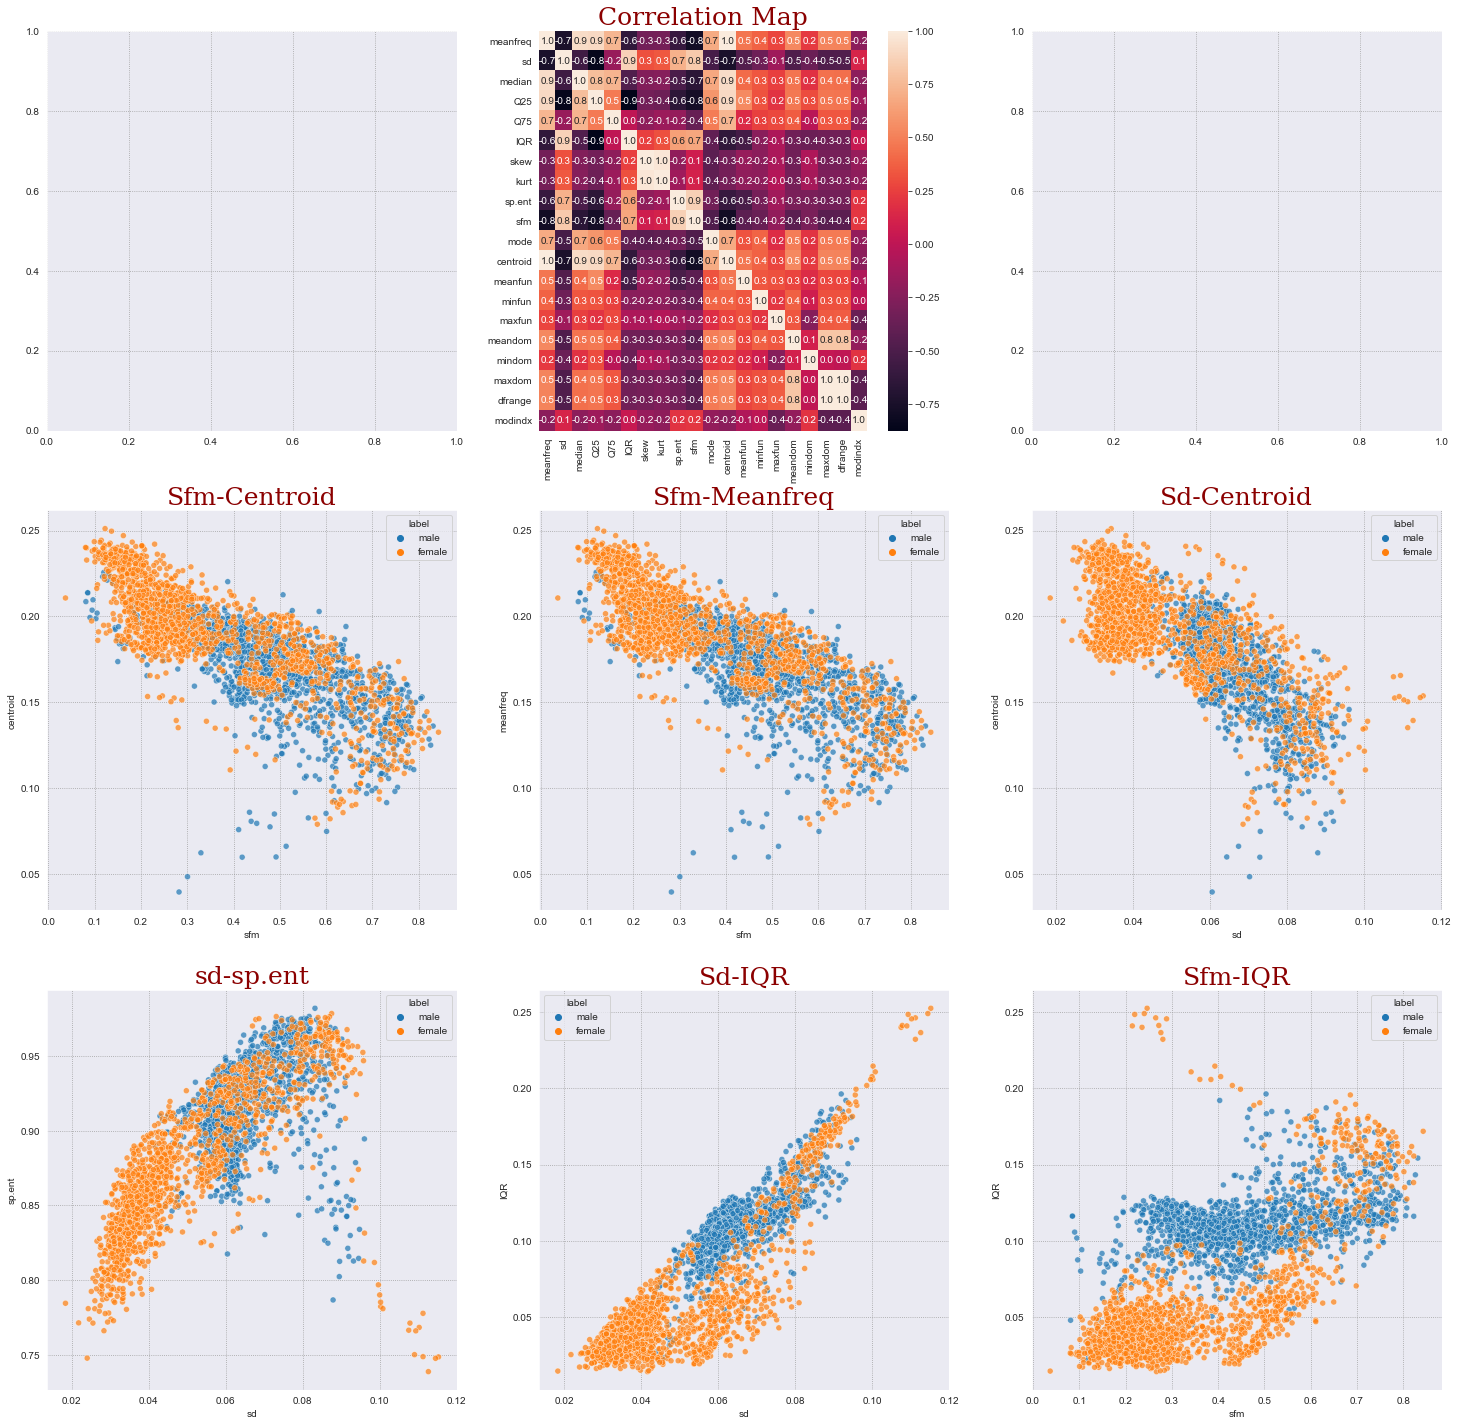

In [33]:
line_correlation_analyz(df)

In [34]:
def mean_effect_label(df):

    # mean and median dict
    dict_mean_effect_male = {}
    dict_mean_effect_female = {}
    dict_median_effect_male = {}
    dict_median_effect_female = {}


    list_label = ['male', 'female']

    # object encoding
    le = LabelEncoder()

    df['label'] = le.fit_transform(df['label'])

    # final df mean and median status by label 
    for i in df.columns:
        dict_mean_effect_male['{}'.format(i)] = df[df['label'] == 1 ]['{}'.format(i)].mean()
        dict_mean_effect_female['{}'.format(i)] = df[df['label'] == 0 ]['{}'.format(i)].mean()

        dict_median_effect_male['{}'.format(i)] = df[df['label'] == 1 ]['{}'.format(i)].median()
        dict_median_effect_female['{}'.format(i)] = df[df['label'] == 0 ]['{}'.format(i)].median()
    
    df_mean_effect_label = pd.DataFrame([dict_mean_effect_male, dict_mean_effect_female, dict_median_effect_male, dict_median_effect_female]).T
    df_mean_effect_label = df_mean_effect_label.rename(columns={0: 'mean_male', 1: 'mean_female', 2: 'median_male', 3:'median_female'})   
    return df_mean_effect_label

In [35]:
mean_effect_label(df)

,mean_male,mean_female,median_male,median_female
meanfreq,0.170813,0.191000,0.176343,0.192732
sd,0.065110,0.049142,0.061781,0.041965
median,0.175299,0.195942,0.180612,0.198226
Q25,0.115562,0.165349,0.122315,0.175373
Q75,0.226346,0.223184,0.228117,0.223744
IQR,0.110784,0.057834,0.109940,0.042689
skew,3.295460,2.984875,1.880420,2.435808
kurt,48.331698,24.805224,6.970088,9.607635
sp.ent,0.917188,0.873066,0.917309,0.865861
sfm,0.471670,0.344763,0.461636,0.277228


### Model Building 
- kNearest Neighbor
- Decision Tree
- Naive Bayes
- Random Forest
- Support Vector Machine
- Logistic Regression

In [142]:
# encoding labels 
def encoding_labels(y_train, y_test):

    # model building 
    le = LabelEncoder()

    # fitting processes 
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    return y_train, y_test

In [143]:
y_train, y_test = encoding_labels(y_train, y_test)

In [157]:
def tunning_fit_knn(X_train_scaled, X_test_scaled, y_train, y_test):
    
    # Hyperparameters

    leaf_size = list(range(1,50))
    n_neighbors = list(range(1,30))
    p=[1,2]

    # hiperparameters dict
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

    # model building 
    knn = KNeighborsClassifier()

    # tuning model building 
    clf = RandomizedSearchCV(knn, hyperparameters, cv=10)
    best_model = clf.fit(X_train_scaled,y_train)

    # best model hyperparameters 
    best_params = clf.best_params_

    print('Tuning results')
    print(best_params)

    # model building 
    knn_tuning = KNeighborsClassifier(p = best_params['p'], n_neighbors =  best_params['n_neighbors'], leaf_size =  best_params['leaf_size'])

    knn_tuning.fit(X_train, y_train)
    print(knn_tuning.score(X_test,y_test))

    # classification report 
    y_pred = knn_tuning.predict(X_test)

    print(classification_report(y_pred, y_test))

    # learning curve 
    sizes, training_scores, testing_scores = learning_curve(knn_tuning,
     X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)
  
    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
    # Drawing plot
    plt.title("LEARNING CURVE FOR KNN Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

Tuning results
{'p': 1, 'n_neighbors': 5, 'leaf_size': 27}
0.7697160883280757
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       305
           1       0.77      0.79      0.78       329

    accuracy                           0.77       634
   macro avg       0.77      0.77      0.77       634
weighted avg       0.77      0.77      0.77       634



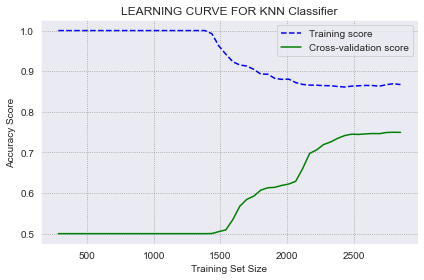

In [158]:
tunning_fit_knn(X_train_scaled, X_test_scaled, y_train, y_test)

In [148]:
def tunning_fit_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test):
    
    # hiperparametrelerin defines

    max_depth =  range(1,5)

    # hiperparametrelerin dict'e çevrilmesi 
    hyperparameters = dict(max_depth = max_depth)

    # model building 
    dt = DecisionTreeClassifier()

    # tuning model building 
    clf = RandomizedSearchCV(dt, hyperparameters, cv=10)
    best_model = clf.fit(X_train_scaled,y_train)

    # best model hyperparameters 
    best_params = clf.best_params_

    print('Tuning results')
    print(best_params)

    # model implemetasyonu 
    dt_tuning = DecisionTreeClassifier(max_depth = best_params['max_depth'])

    dt_tuning.fit(X_train, y_train)
    print(dt_tuning.score(X_test,y_test))

    # classification report 
    y_pred = dt_tuning.predict(X_test)

    print(classification_report(y_pred, y_test))

    # learning curve 
    sizes, training_scores, testing_scores = learning_curve(dt_tuning,
     X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)
  
    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
    # Drawing plot
    plt.title("LEARNING CURVE FOR DECISION TREE Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

Tuning results
{'max_depth': 4}
0.9637223974763407
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       312
           1       0.94      0.99      0.97       322

    accuracy                           0.96       634
   macro avg       0.97      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



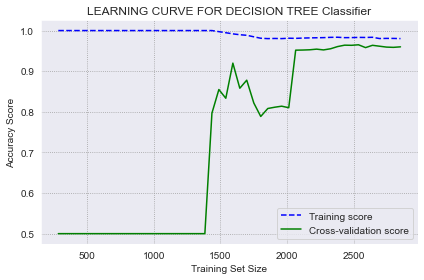

In [149]:
tunning_fit_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test)

In [150]:
def tunning_fit_nb(X_train_scaled, X_test_scaled, y_train, y_test):
    
    # hiperparametrelerin defines 

    var_smoothing =  np.logspace(0,-9, num=100)

    # hiperparametrelerin dict'e çevrilmesi 
    hyperparameters = dict(var_smoothing = var_smoothing)

    # model building 
    nb = GaussianNB()

    # tuning model building 
    clf = RandomizedSearchCV(nb, hyperparameters, cv=10)
    best_model = clf.fit(X_train_scaled,y_train)

    # best model hyperparameters 
    best_params = clf.best_params_

    print('Tuning results')
    print(best_params)

    # model implemetasyonu 
    nb_tuning = GaussianNB(var_smoothing = best_params['var_smoothing'])

    nb_tuning.fit(X_train, y_train)
    print(nb_tuning.score(X_test,y_test))

    # classification report 
    y_pred = nb_tuning.predict(X_test)

    print(classification_report(y_pred, y_test))

    # learning curve 
    sizes, training_scores, testing_scores = learning_curve(nb_tuning,
     X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)
  
    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
    # Drawing plot
    plt.title("LEARNING CURVE FOR NAIVE BAYES Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

Tuning results
{'var_smoothing': 1e-07}
0.7791798107255521
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       323
           1       0.75      0.82      0.78       311

    accuracy                           0.78       634
   macro avg       0.78      0.78      0.78       634
weighted avg       0.78      0.78      0.78       634



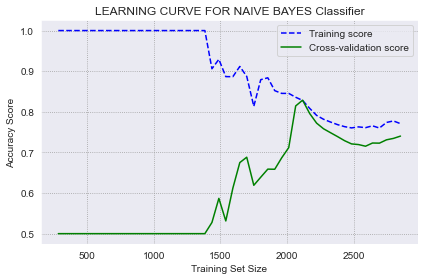

In [151]:
tunning_fit_nb(X_train_scaled, X_test_scaled, y_train, y_test)

In [152]:
def tunning_fit_random_forest(X_train_scaled, X_test_scaled, y_train, y_test):
    
    # hiperparametrelerin tanımlanması 

    n_estimators = range(1,400)
    # hiperparametrelerin dict'e çevrilmesi 
    hyperparameters = dict(n_estimators = n_estimators)

    # model building 
    rf = RandomForestClassifier()

    # tuning model building 
    clf = RandomizedSearchCV(rf, hyperparameters, cv=10)
    best_model = clf.fit(X_train_scaled,y_train)

    # best model hyperparameters 
    best_params = clf.best_params_

    print('Tuning results')
    print(best_params)

    # model implemetasyonu 
    rf_tuning = RandomForestClassifier(n_estimators = best_params['n_estimators'])

    rf_tuning.fit(X_train, y_train)
    print(rf_tuning.score(X_test,y_test))

    # classification report 
    y_pred = rf_tuning.predict(X_test)

    print(classification_report(y_pred, y_test))

    # learning curve 
    sizes, training_scores, testing_scores = learning_curve(rf_tuning,
     X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)
  
    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
    # Drawing plot
    plt.title("LEARNING CURVE FOR RANDOM FOREST Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

Tuning results
{'n_estimators': 75}
0.9794952681388013
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       304
           1       0.97      0.99      0.98       330

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



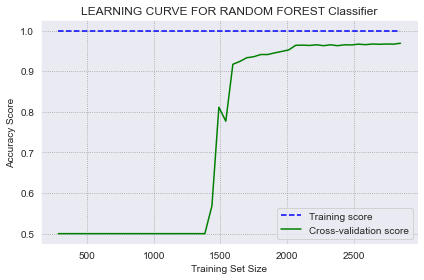

In [156]:
tunning_fit_random_forest(X_train_scaled, X_test_scaled, y_train, y_test)

In [154]:
def tunning_fit_svm(X_train_scaled, X_test_scaled, y_train, y_test):
    
    # hiperparametrelerin tanımlanması 
    hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

    # model building 
    svm = SVC()

    # tuning model building 
    clf = RandomizedSearchCV(SVC(), hyperparameters, cv=10)
    best_model = clf.fit(X_train_scaled,y_train)

    # best model hyperparameters 
    best_params = clf.best_params_

    print('Tuning results')
    print(best_params)

    # model implemetasyonu 
    svm_tuning = SVC(C =best_params['C'] , gamma = best_params['gamma'] , kernel = best_params['kernel']) 
    
    svm_tuning.fit(X_train, y_train)
    print(svm_tuning.score(X_test,y_test))

    # classification report 
    y_pred = svm_tuning.predict(X_test)

    print(classification_report(y_pred, y_test))
    
    # learning curve 
    sizes, training_scores, testing_scores = learning_curve(svm_tuning,
     X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)
  
    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
    # Drawing plot
    plt.title("LEARNING CURVE FOR SVM Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

Tuning results
{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
0.9148264984227129
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       291
           1       0.93      0.91      0.92       343

    accuracy                           0.91       634
   macro avg       0.91      0.92      0.91       634
weighted avg       0.92      0.91      0.91       634



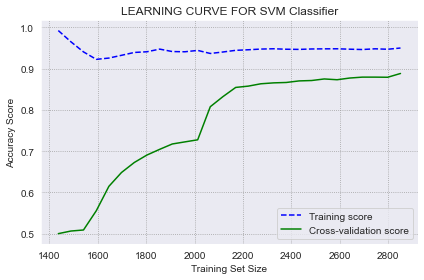

In [155]:
tunning_fit_svm(X_train_scaled, X_test_scaled, y_train, y_test)